In [1]:
import numpy
from hypercube_data import *
import os
import pandas as pd
import cv2
from scipy.fft import fft
import random
import glob

from matplotlib.lines import Line2D

In [35]:
spectrum_data = []
pixely = []

paths = glob.glob('data/*.dat')
index = 41

test_path = ['.\data']
for path in test_path:
    file_list = os.listdir(path)
    for file in file_list[:2]:
        if file.endswith(".dat"):
            with open(os.path.join(path, file), newline='')  as filex:
                filename=filex.name

                #rediction = model.predict(learn_data)

                spectrum_data, pixely = Cube_Read(paths[index],wavearea=100, Firstnm=0,Lastnm=100).cube_matrix()
                #spectrum_data1, pixely = Cube_Read(filename,wavearea=100, Firstnm=1,Lastnm=100).cube_matrix()
                spectrum_data1 = spectrum_data.copy()

                #abc = prediction.reshape((640, pixely))
                '''for y in range(640):
                    for x in range(pixely):
                        # 640,480,100
                        A = np.average(spectrum_data[x, y, 2:14])
                        C = np.average(spectrum_data[x, y, 30:42])
                        B = -np.log(A / C)
                        B = B - 0.1
                        B = B / (1.6)
                        if np.average(spectrum_data[x, y, :]) < 0.1 or A > 0.7 or B < 0:
                            spectrum_data1[x, y, 1] = 3

                colors = np.zeros((640, pixely, 4))
                for j in range(pixely):
                    for i in range(640):
                        if spectrum_data1[j, i, 1] == 3:
                            colors[j, i, :] = [0, 0, 0, 1]  # black background

                plot = cube(
                    filename,wavearea=100, Firstnm=0,Lastnm=99).cube_plot()
                colors = np.rot90(colors)
                plt.imshow(colors)'''

In [26]:
print(np.array(spectrum_data).shape, pixely)

(480, 640, 100) 480


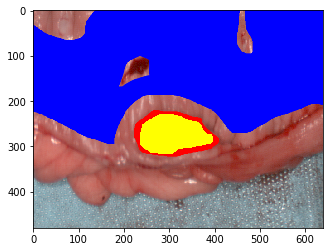

[  0   0   0 ... 294 294 294]
[137 138 139 ... 176 177 178]


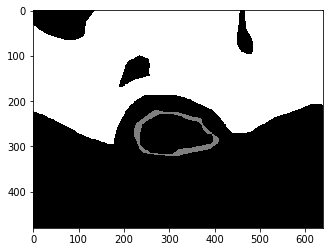

In [36]:
mask = cv2.imread(paths[index]+'_Mask JW Kolo.png')[..., ::-1]
plt.imshow(mask)
plt.show()
image = np.zeros(mask.shape)

#mask = cv2.transpose(mask) 

gesund = np.where((mask[:, :, 0] == 0) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 255))
ill = np.where((mask[:, :, 0] == 255) & (mask[:, :, 1] == 0) & (mask[:, :, 2] == 0))
#x = np.where(mask[:, :, 0] == 0)
print(gesund[0])
print(gesund[1])

image[gesund[0], gesund[1]] = 1
image[ill[0], ill[1]] = 0.5

plt.imshow(image)



(137581, 100) (3775, 100)


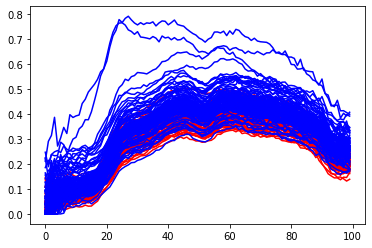

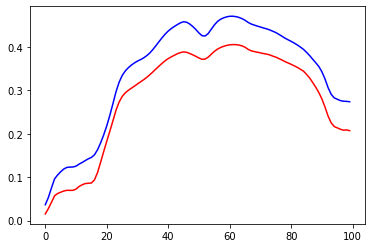

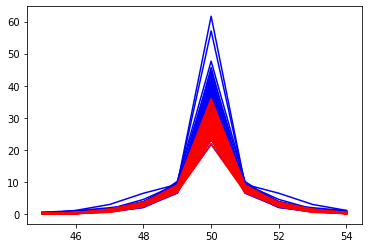

In [38]:
spectrum_data = np.array(spectrum_data)


gesund_spectrum = list(spectrum_data[gesund[0], gesund[1]])
ill_spectrum = list(spectrum_data[ill[0], ill[1]])

random.shuffle(gesund_spectrum)
random.shuffle(ill_spectrum)

gesund_spectrum = np.array(gesund_spectrum)
ill_spectrum = np.array(ill_spectrum)
print(gesund_spectrum.shape, ill_spectrum.shape)

how_many = 100


for i in ill_spectrum[:how_many]:
    plt.plot(np.arange(100), i, c='red')
    
for g in gesund_spectrum[:how_many]:    
    plt.plot(np.arange(100), g, c='blue')



plt.show()
    
plt.plot(np.arange(100), np.average(gesund_spectrum, axis=0), c='blue')
plt.plot(np.arange(100), np.average(ill_spectrum, axis=0), c='red')

    
plt.show()

k = 100



for g in gesund_spectrum[:how_many]:   
    #fft3 = np.fft.fft(g)
    plt.plot(np.arange(k)[45:55], np.fft.fftshift(np.abs(fft(g)[:k]))[45:55], c='blue')
    

for i in ill_spectrum[:how_many]:
    plt.plot(np.arange(k)[45:55], np.fft.fftshift(np.abs(fft(i)[:k]))[45:55], c='red')



    
plt.show()

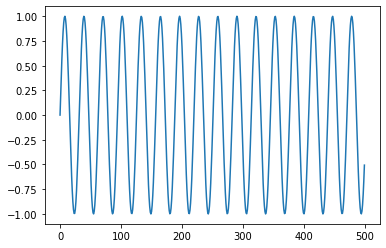

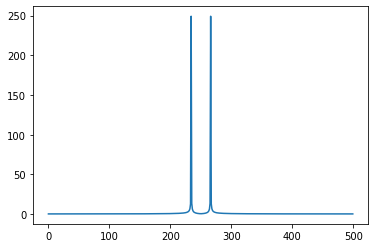

In [114]:
T = 1 / 5
N = 500
graf = np.sin( np.linspace(0, N * T, N))
plt.plot(np.arange(graf.shape[0]), graf)
plt.show()

fft2 = np.fft.fft(graf)
#plt.plot(np.linspace(0.0, 1.0/(2.0*T), N // 2), 2.0/N * np.abs(fft(graf)[:N // 2]))
plt.plot(np.arange(500), np.fft.fftshift(np.abs(fft2)))
plt.show()

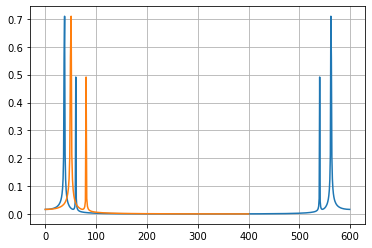

In [100]:
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
#y = np.sin(2.0*np.pi*x) #
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5 * np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#xf = np.linspace(0.0, 1.0/(1.0*T), N//1)
import matplotlib.pyplot as plt
plt.plot(np.arange(N), 2.0/N * np.absolute(yf))

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()
plt.show()

In [1]:
from data_loader import *

get_data()

length 37114 4070 1323
split 29691 3256 1058
(34005, 2) (8502, 2)


E:\HSI_data\data_loader.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  gesund_data = list(np.concatenate(np.array(gesund_data), axis=0))                  #label 0
E:\HSI_data\data_loader.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ill_data =  list(np.concatenate(np.array(ill_data), axis=0))                       #label 1
E:\HSI_data\data_loader.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

In [1]:
import tensorflow as tf

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

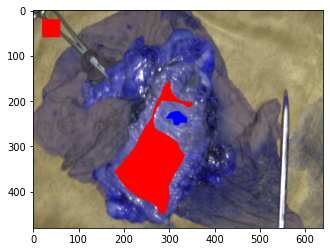

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('test.png')

for i in range(20, 60):
    for j in range(20, 60):
        image[i, j] = [255, 0, 0]

plt.imshow(image)

(828, 2)


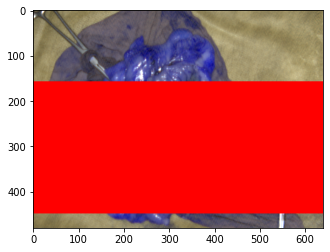

In [5]:
from data_loader import * 

gt_image, spectrum_data, indexes = get_data_for_showing()

for i in indexes:
    gt_image[i] = [255, 0, 0]

plt.imshow(gt_image)
plt.show()

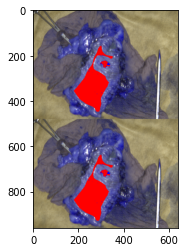

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('test.png')

res = np.concatenate((image, image), axis=0)

plt.imshow(res)

In [7]:
import config 
import os

os.path.join(config.DATA_PATHS[0], '2019_07_15_11_33_28_SpecCube.dat')

'E:\\HSI_data\\data\\2019_07_15_11_33_28_SpecCube.dat'

In [32]:
import glob
import os
import shutil

paths = glob.glob('F:\Spectrumdata\*\\')

print(len(paths))

for path in paths:
    print('======================')
    print(path)
    
    parts = path.split('\\')
    
    name = parts[-2]
    
    images = glob.glob('F:\Spectrumdata\\'+name+"*_SpecCube*")
    
            
    print(len(images), 'images')
    print(images)
    
    if len(images) == 0:
        print("Didn't find image match for forder: ", path)
    elif len(name) == 19 and False:
        shutil.copy(images[0], r'C:\Users\Tkachenko\Desktop\HSI_data\data')
        shutil.copy('F:\Spectrumdata\\'+name + '/' + name+'_SpecCube.dat', r'C:\Users\Tkachenko\Desktop\HSI_data\data')
    elif len(images) > 1:
        for image_path in images:
            image_name = image_path.split('\\')[-1].split('_S')[0]
            shutil.copy(image_path, r'C:\Users\Tkachenko\Desktop\HSI_data\data')
            shutil.copy('F:\Spectrumdata\\'+name + '\\' + image_name+'\\'+image_name+'_SpecCube.dat', r'C:\Users\Tkachenko\Desktop\HSI_data\data')
            
            
        


64
F:\Spectrumdata\2019_07_17_15_38_14\
1 images
['F:\\Spectrumdata\\2019_07_17_15_38_14_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2019_09_04\
1 images
['F:\\Spectrumdata\\2019_09_04_12_43_40_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2019_08_09\
1 images
['F:\\Spectrumdata\\2019_08_09_12_17_55_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2019_08_12\
1 images
['F:\\Spectrumdata\\2019_08_12_10_52_33_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2019_08_23\
1 images
['F:\\Spectrumdata\\2019_08_23_12_15_26_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2019_08_28\
1 images
['F:\\Spectrumdata\\2019_08_28_14_00_34_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2020_05_07\
1 images
['F:\\Spectrumdata\\2020_05_07_12_52_25_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2020_05_13\
2 images
['F:\\Spectrumdata\\2020_05_13_19_30_26_SpecCube.dat_Mask JW Kolo.png', 'F:\\Spectrumdata\\2020_05_13_19_31_15_SpecCube.dat_Mask JW Kolo.png']
F:\Spectrumdata\2020_05_15\
1 images
['F:\\Sp

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Spectrumdata\\2019_10_25\\2019_10_25_11_19_55\\2019_10_25_11_19_55_SpecCube.dat'

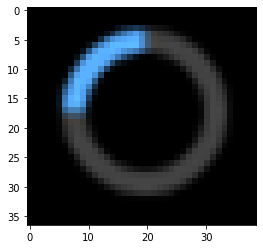

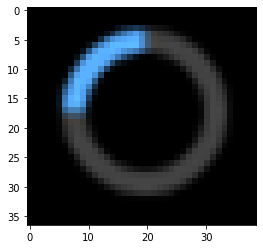

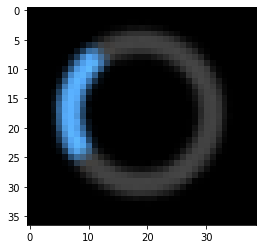

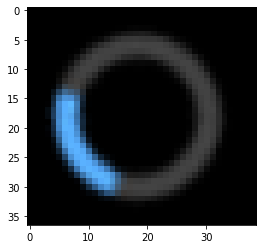

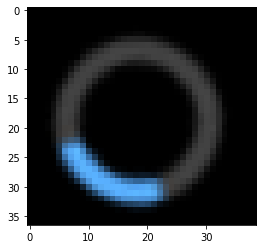

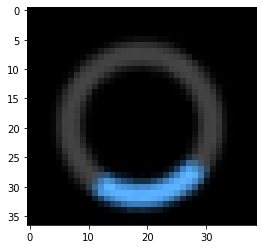

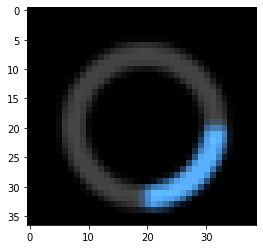

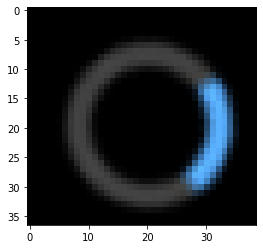

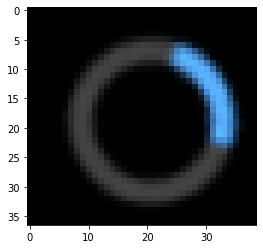

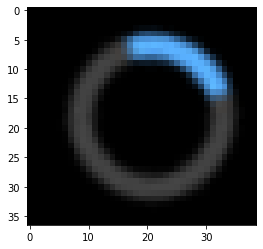

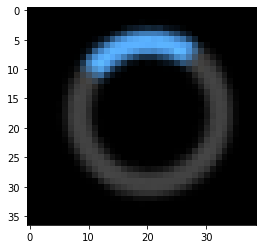

(37, 39, 3)


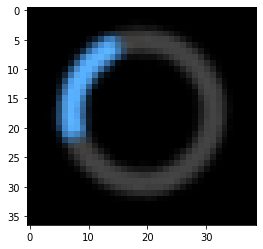

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

image = cv2.imread(r'C:\Users\Tkachenko\Desktop\autocuff\round_button_orange.png')
plt.imshow(image)
plt.show()

length = 10

for i in range(0, length):
    image_ = rotate_image(image, i*(360 / length))
    
    plt.imshow(image_)
    plt.show()
    
    name = r'C:\Users\Tkachenko\Desktop\autocuff\orange_round\orange_round_'+str(i)+r'.png'
    cv2.imwrite(name, image_)

image20 = rotate_image(image, 20)
print(image20.shape)
plt.imshow(image20)
plt.show()


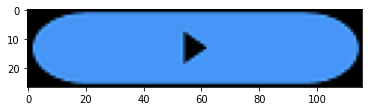

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[ 0  4  6  9 11 12 13 14 15 17 18 19 20 23 24 25 26 27 28 29 30 32 34 36
 38 39 40 41 42 43 44 45 49 50 52 53 54 55 57 58 59 60 61 62 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81]


In [39]:
color_image = cv2.imread(r'C:\Users\Tkachenko\Desktop\autocuff\orange_button.png')

plt.imshow(color_image)
plt.show()

print(color_image)

print(np.unique(color_image[..., 0]))